  `####################################################################################`

`####` <l style= "color:yellow; font-size: 20px; ">&emsp;Hack-a-thon GeeksforGeeks Hiring Data Science &emsp;</li> 

 `####`<l style="font-family: 'Courier New', monospace; color: #E6E6FA; font-size: 20px; ">&emsp;Submitted by Mortuza Reza &emsp; &emsp; </l> 

 `####`<l style="font-family: 'Courier New', monospace; color: orange; font-size: 16px; font-style:italic; ">&emsp;m.reza@usask.ca &emsp; &emsp; </l>

 `####`<l style="font-family: 'Courier New', monospace; color: orange; font-size: 16px; ">&emsp;iamreza.ca &emsp; &emsp; </l>

  `####################################################################################`
# Problem 2:
Project Name: Geeksforgeeks Data analysis
Scrape the Geeksforgeeks youtube channel videos of the past 6 months' dataset

Data was extracted using https://developers.google.com/youtube/v3/docs .
I have extracted all the available data using custom build Django web application and stored in PostgreSQL database. Youtube data was downloaded from the database as csv format for analysis.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('GeeksforGeeks.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2562 entries, 0 to 2561
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Channel Name    2562 non-null   object
 1   Video Title     2562 non-null   object
 2   Views           2562 non-null   int64 
 3   Likes           2562 non-null   int64 
 4   Tags            2203 non-null   object
 5   Description     2528 non-null   object
 6   Favorites       2562 non-null   int64 
 7   Comments        2562 non-null   int64 
 8   Duration        2562 non-null   object
 9   Date Published  2562 non-null   object
 10  Video Url       2562 non-null   object
dtypes: int64(4), object(7)
memory usage: 220.3+ KB


Date field was converted to datetime field

In [5]:
df['date'] = pd.to_datetime(df['Date Published'])

Created a new dataset for the last 6 months data

In [48]:
type(df['date'])

pandas.core.series.Series

In [6]:
# Get the current date
current_date = pd.to_datetime('today').tz_localize(df['date'].dt.tz)

six_months_ago = current_date - pd.DateOffset(months=6)

In [19]:
last_six_months_df = df[df['date'] >= six_months_ago]

In [20]:
last_six_months_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 200
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   Channel Name    201 non-null    object             
 1   Video Title     201 non-null    object             
 2   Views           201 non-null    int64              
 3   Likes           201 non-null    int64              
 4   Tags            110 non-null    object             
 5   Description     170 non-null    object             
 6   Favorites       201 non-null    int64              
 7   Comments        201 non-null    int64              
 8   Duration        201 non-null    object             
 9   Date Published  201 non-null    object             
 10  Video Url       201 non-null    object             
 11  date            201 non-null    datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), int64(4), object(7)
memory usage: 20.4+ KB


In [ ]:
last_six_months_df.drop(['Channel Name','Tags', 'Favorites','Date Published'], axis=1, inplace=True)

In [22]:
last_six_months_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 200
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   Video Title  201 non-null    object             
 1   Views        201 non-null    int64              
 2   Likes        201 non-null    int64              
 3   Description  170 non-null    object             
 4   Comments     201 non-null    int64              
 5   Duration     201 non-null    object             
 6   Video Url    201 non-null    object             
 7   date         201 non-null    datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), int64(3), object(4)
memory usage: 14.1+ KB


# 1. Number of videos in the past 6 months from the start date. Must mention the dates in the solution.

In [23]:
start_date = last_six_months_df['date'].iloc[0]
end_date = last_six_months_df['date'].iloc[-1]

print(f"The dataset contains data from {start_date.date()} to {end_date.date()}")

The dataset contains data from 2023-08-04 to 2023-02-08


# 2. Create a pandas data frame with columns name as videos title, views, Length of videos, and videos link

In [24]:
last_six_months_df.head()

,Video Title,Views,Likes,Description,Comments,Duration,Video Url,date
0,Printer Input Changes | GeeksforGeeks,613,37,"In this video, we're going to be talking about...",1,00:00:36,https://youtube.com/watch?v=N8nnp2OBDTs,2023-08-04 14:08:00+00:00
1,Kickstarting your Content Creation Side Hustle...,723,24,Share your interview experiences- be it of cam...,0,00:45:51,https://youtube.com/watch?v=-MfwsJmlcKU,2023-08-04 23:29:26+00:00
2,GeeksforGeeks,656,58,Explore Premium LIVE and Online Courses : \nht...,3,00:00:50,https://youtube.com/watch?v=hH4EtOUXxOg,2023-08-05 13:49:00+00:00
3,Complete Guide to Software Testing and Automation,836,30,Don't forget to avail the Launch Offer on the ...,0,00:50:16,https://youtube.com/watch?v=iOnGnUYWNLo,2023-08-05 22:22:47+00:00
4,3 Reasons Why You Should Learn GCP | GeeksforG...,1127,69,Unlock the limitless potential in the cloud wo...,0,00:00:56,https://youtube.com/watch?v=ub3KzaT6w2Y,2023-08-03 16:19:00+00:00


# 3. Name the most viewed topics in the past 6 months.

The video with title `Learn System Design with GeeksforGeeks` got the heighest amount of **118333** Views

In [25]:
# Sort the DataFrame based on the Views
df_sorted_by_views = last_six_months_df.sort_values(by='Views', ascending=False)

In [26]:
# Top 3 videos  based on the  views
# top_3 = df_sorted_by_views.head(3)
top_3 = df_sorted_by_views[:3]
print(f"So, the video with title `{df_sorted_by_views.iloc[0]['Video Title']}` got the heighest amount of {df_sorted_by_views.iloc[0]['Views']} Views")
top_3

So, the video with title `Learn System Design with GeeksforGeeks` got the heighest amount of 118333 Views


,Video Title,Views,Likes,Description,Comments,Duration,Video Url,date
190,Learn System Design with GeeksforGeeks,118333,633,Explore now: https://practice.geeksforgeeks.or...,3,00:00:36,https://youtube.com/watch?v=XQEZ07JhVuA,2023-02-21 06:09:09+00:00
122,GeeksforGeeks Classroom Program | Now in Noida...,108499,92,Register for MERN Fullstack Classes: https://p...,6,00:00:38,https://youtube.com/watch?v=16D2cuRy5JY,2023-05-08 07:48:05+00:00
98,Free Summer Offline Classes on Python Programi...,106927,53,"Limited seats available, book your free slot n...",2,00:00:37,https://youtube.com/watch?v=OOLXHwZzHfM,2023-06-09 12:12:12+00:00


In [27]:
# Bottom 3 videos  based on the  views
# bottom_3 = df_sorted_by_views.tail(3)
bottom_3 = df_sorted_by_views[-3:]
bottom_3


,Video Title,Views,Likes,Description,Comments,Duration,Video Url,date
24,Day 22 The DevOps Mindset | Transforming Organ...,499,10,Welcome to yet another enlightening video pres...,0,00:46:42,https://youtube.com/watch?v=YBPHbwwOD1g,2023-07-23 02:36:27+00:00
8,Complete School Guide for CBSE | Free Resource...,456,24,"Complete CBSE Class 12 Computer Science, Schoo...",0,00:00:56,https://youtube.com/watch?v=1ECMlxC6jbs,2023-07-31 12:35:28+00:00
15,"Unraveling the Geek-a-thon: The What, How, and...",414,9,Welcome to GeeksforGeeks' Data Analysis Master...,0,00:45:44,https://youtube.com/watch?v=6e0v_NhsFMQ,2023-07-27 08:04:05+00:00


# 4. Name the topics with the highest video length.

The  video with title `SDE Preparation in 3 hours` have the duration of **2 hours 55 min 27 sec**

In [28]:
df_sorted_by_length = last_six_months_df.sort_values(by='Duration', ascending=False)

In [29]:
print(f"The  video with title `{df_sorted_by_length.iloc[0]['Video Title']}` have the duration of {df_sorted_by_length.iloc[0]['Duration']} ")

df_sorted_by_length[:3]


The  video with title `SDE Preparation in 3 hours` have the duration of 02:55:27 


,Video Title,Views,Likes,Description,Comments,Duration,Video Url,date
144,SDE Preparation in 3 hours,3181,154,Enter the Geeks Summer Carnival: https://pract...,1,02:55:27,https://youtube.com/watch?v=ftDoBLp-OfU,2023-04-05 19:17:50+00:00
96,CodeCamp Day 2 | Exploring Arrays and Problem ...,7031,308,Welcome to CodeCamp Day 2! In this exciting se...,10,02:29:20,https://youtube.com/watch?v=OMHeYpQCCPE,2023-06-11 17:15:25+00:00
77,CodeCamp Day 13 | Discovering Graph Traversal ...,1023,45,Welcome to CodeCamp Day 13! In this exciting s...,0,02:14:24,https://youtube.com/watch?v=hgkjJD5hb5g,2023-06-22 17:10:59+00:00


# 5. Make a comparison between the number of views and video length using a Graph.

In [30]:
import plotly.express as px

In [31]:
fig = px.scatter(df_sorted_by_length, x='Duration', y='Views', title='Comparison between Number of Views and Video Length')
fig

In [33]:
# Removing outliers with Interquartile Range (IQR)

# First quartile (25th percentile)
Q1 = df_sorted_by_length['Views'].quantile(0.25)

#Third quartile (75th percentile)
Q3 = df_sorted_by_length['Views'].quantile(0.75)

# IQR
IQR = Q3 - Q1

# Lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers from the 'views' column
df_filtered = df_sorted_by_length[(df_sorted_by_length['Views'] >= lower_bound) & (df_sorted_by_length['Views'] <= upper_bound)]


# To keep only the outliers, we can use:
# df_outliers = df_sorted_by_length[(df_sorted_by_length['Views'] < lower_bound) | (df_sorted_by_length['Views'] > upper_bound)]


In [34]:
len(df_sorted_by_length)

201

In [35]:
len(df_filtered)

179

In [36]:
# We can see that we have lost 21 videos from the dataset as outliers

In [37]:
fig = px.scatter(df_filtered, x='Duration', y='Views', title='Comparison between Number of Views and Video Length After Outlier Remove')
fig

#  Wordcloud 
All the video discriptions were used to generate the Wordcloud, the clean_text() functions is not included here. You can use any function to clean the unnecessary words. 

In [42]:
import re

In [43]:
#Some data cleaning cleaning 

all_descriptions = df['Description']
clean_all_descriptions = []
for t in all_descriptions:
    clean_all_descriptions.append(clean_text(str(t)))

cloud = ''
for x in clean_all_descriptions:
    cloud+=str(x + ' ')

In [44]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import io, base64, urllib

from django.core.files.base import ContentFile
from django.core.files import File
from PIL import Image, ImageDraw

In [45]:
stop_list = ['hi', 'vs', 'lot', 'now']
stop_words = STOPWORDS.update(stop_list)

In [46]:
# Generate word cloud
wordcloud = WordCloud(width= 3000, height = 2000, max_words=200, random_state=0, background_color='gray', \
    scale=1, colormap='Pastel1',\
    collocations=False, normalize_plurals=True, stopwords = stop_words).generate(cloud)

(-0.5, 2999.5, 1999.5, -0.5)

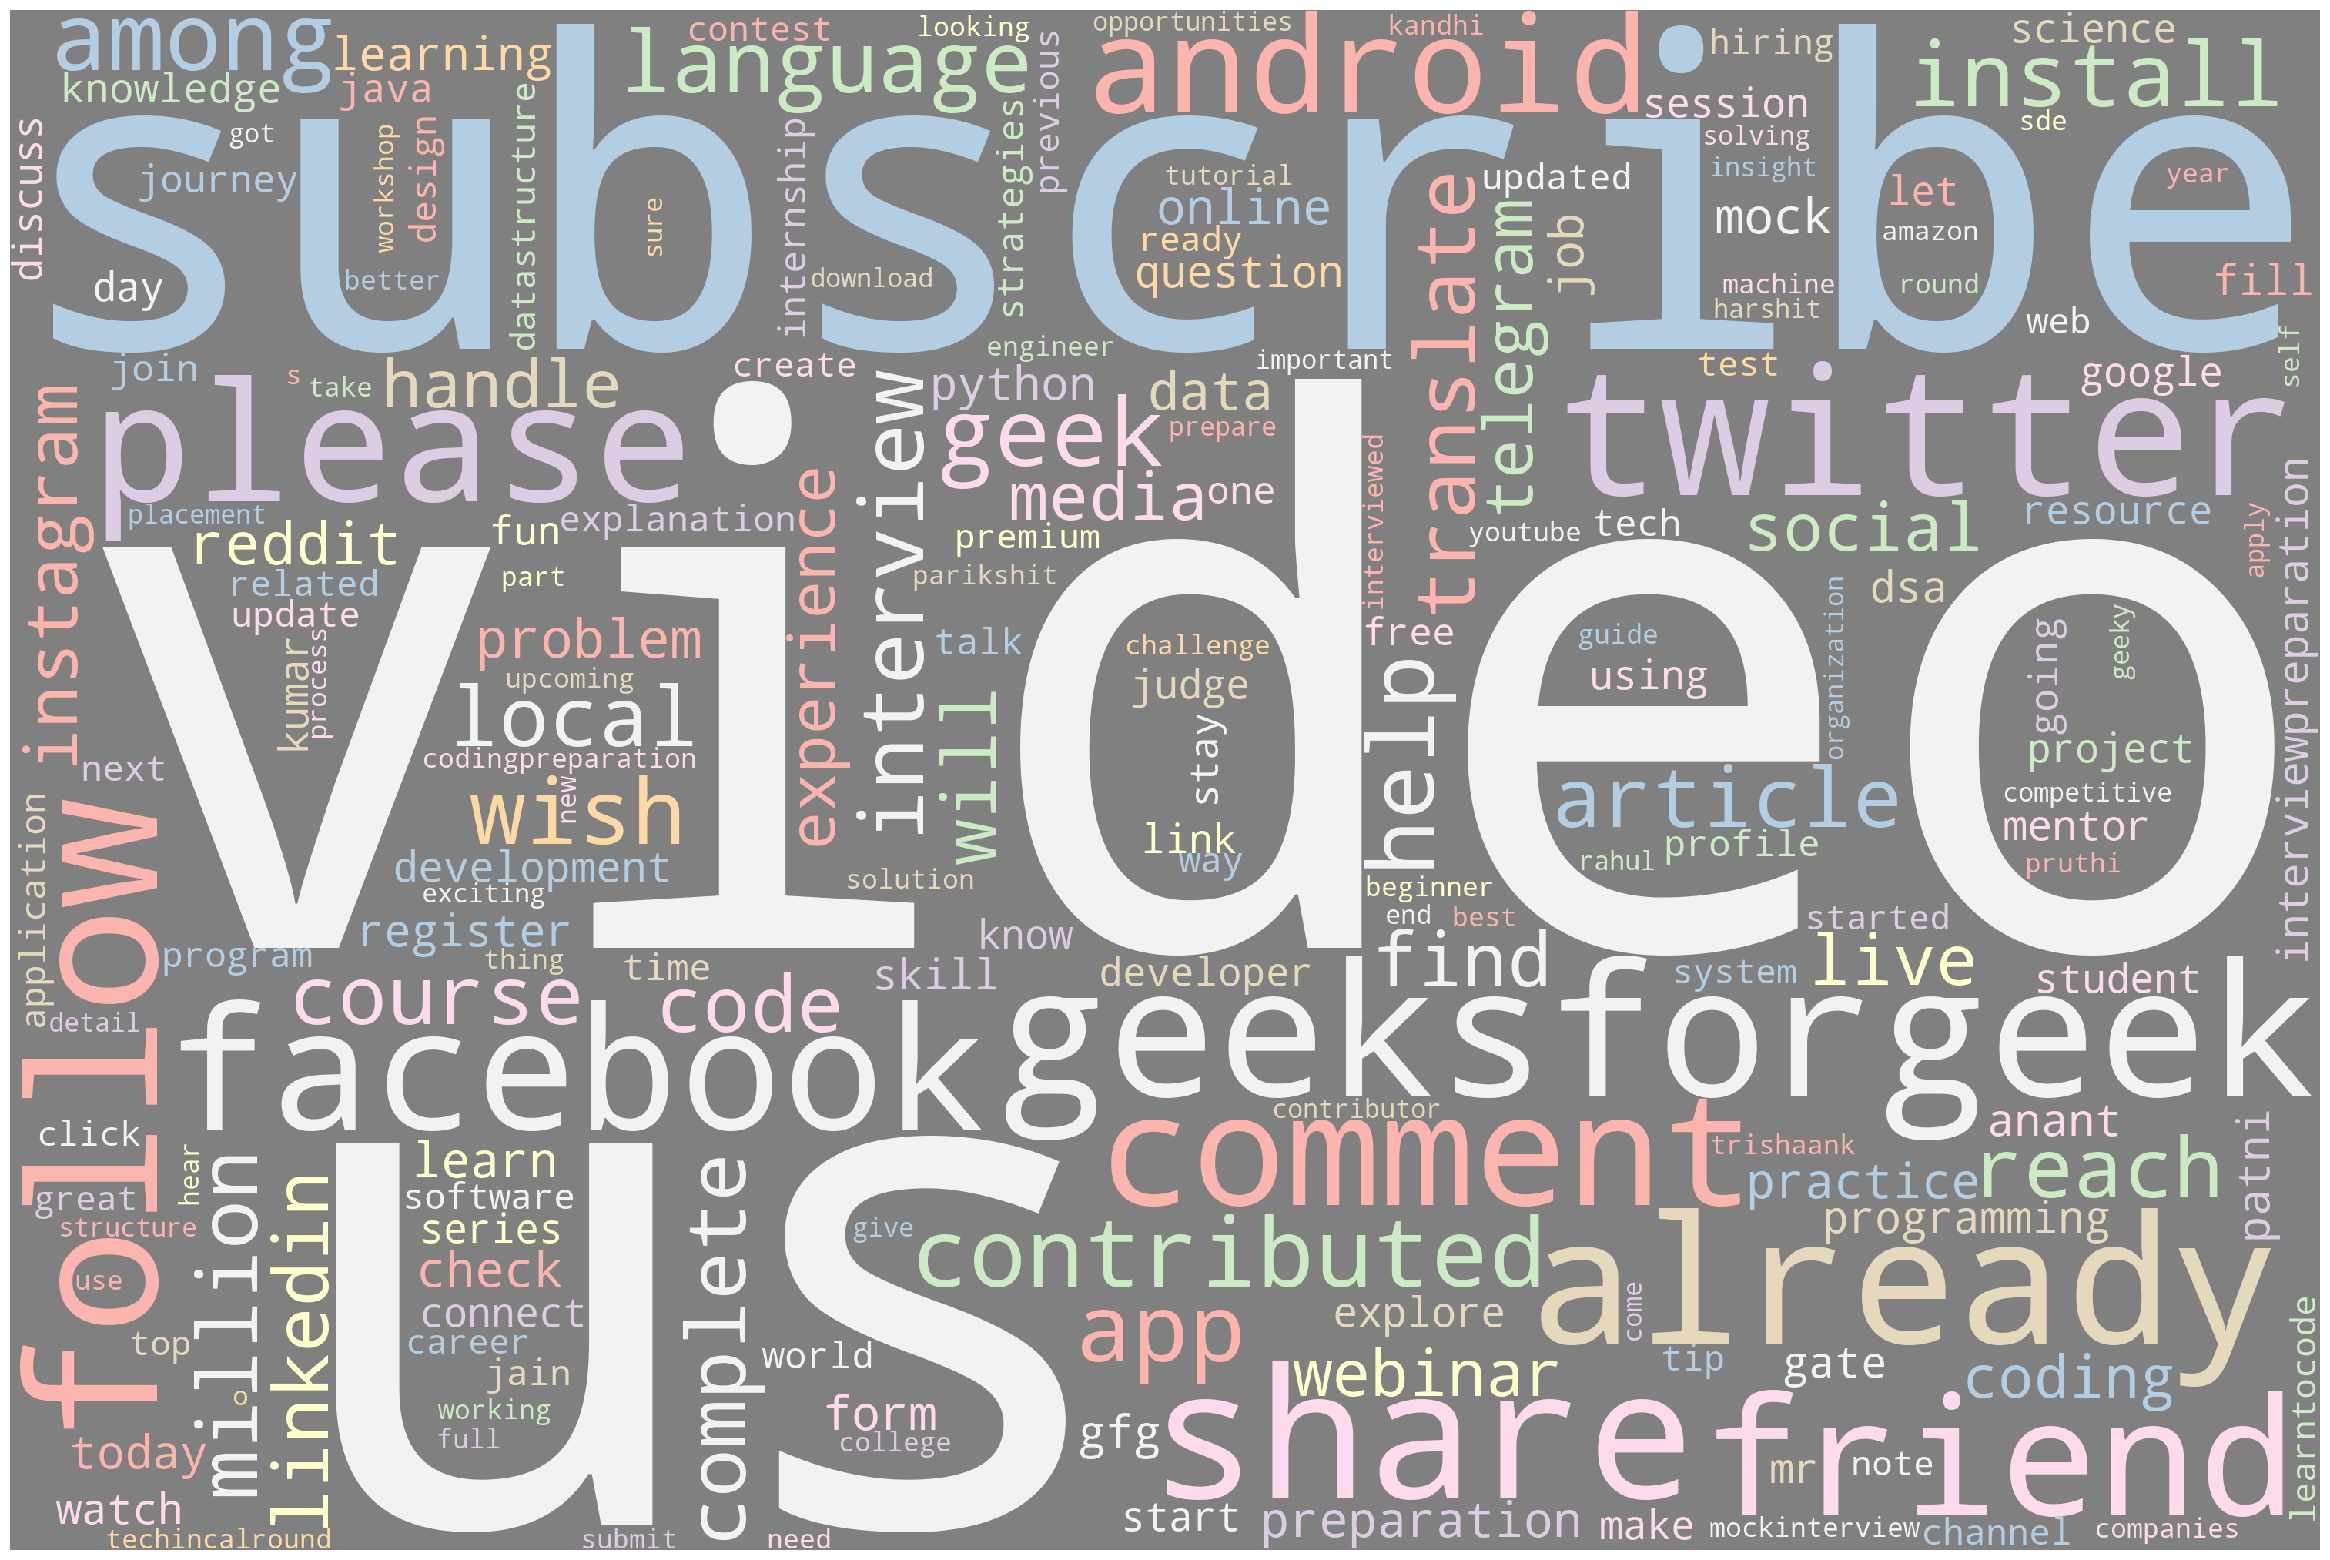

In [47]:
plt.figure(figsize=(30, 20))

plt.imshow(wordcloud, interpolation="none")
plt.axis("off")

### Youtube channel data extraction script

In [3]:
import requests
#  https://developers.google.com/youtube/v3/guides/working_with_channel_ids

# Set your YouTube API KEY
key = "YouTube API KEY"
 
# Channel name or channel ID
channel = "@GeeksforGeeksVideos"
 

csv = "{channel}.csv" 
 
try:
    # Get the channel ID from API
    url = "https://youtube.googleapis.com/youtube/v3/channels?forUsername=" + channel + "&key=" + key
    request = requests.get(url)
    channelid = request.json()["items"][0]["id"]
 
except:
    url = "https://youtube.googleapis.com/youtube/v3/search?q=" + channel + "&type=channel" + "&key=" + key
    request = requests.get(url)
    channelid = request.json()["items"][0]["id"]["channelId"]
 
# Create the playlist_id based on the channel_id

playlistid = list(channelid)
playlistid[1] = "U"
playlistid = "".join(playlistid)
 
# Query for all videos based on playlistid and writes the video title and URL to a CSV file
lastpage = "false"
nextPageToken = ""

while lastpage:
    videosUrl = "https://www.googleapis.com/youtube/v3/playlistItems?part=snippet%2CcontentDetails&playlistId=" + playlistid + "&pageToken=" + nextPageToken + "&maxResults=50" + "&fields=items(contentDetails(videoId%2CvideoPublishedAt)%2Csnippet(publishedAt%2Ctitle))%2CnextPageToken%2CpageInfo%2CprevPageToken%2CtokenPagination&key=" + key
    request = requests.get(videosUrl)
    videos = request.json()
    for video in videos["items"]:
        f = open(csv,"a")
        f.write(video["snippet"]["title"].replace(",","") + "," + "https://www.youtube.com/watch?v=" + video["contentDetails"]["videoId"] + "\n")
        f.close()
    try:
        nextPageToken = videos["nextPageToken"]
    except:
        break